In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [176]:
# import data
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
#ess = ess.dropna()
#print(ess.isnull().values.any())
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


__1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

In [177]:
trust = ess['ppltrst'].groupby([ess['cntry'], ess['year']])
trust.describe()

count      mean       std  min   25%  50%  75%   max
cntry year                                                       
CH    6      773.0  5.677878  2.130701  0.0  4.00  6.0  7.0  10.0
      7      773.0  5.751617  2.143888  0.0  5.00  6.0  7.0  10.0
CZ    6      651.0  4.362519  2.409738  0.0  3.00  4.0  6.0  10.0
      7      657.0  4.424658  2.305389  0.0  3.00  5.0  6.0  10.0
DE    6       14.0  5.214286  1.528125  3.0  4.25  5.0  6.5   8.0
      7       14.0  5.357143  2.530039  2.0  3.25  5.5  7.0  10.0
ES    6     1213.0  5.114592  2.183623  0.0  4.00  5.0  7.0  10.0
      7     1211.0  4.895128  2.148165  0.0  3.00  5.0  6.0  10.0
NO    6      730.0  6.649315  1.749868  0.0  5.00  7.0  8.0  10.0
      7      730.0  6.598630  1.811183  0.0  5.00  7.0  8.0  10.0
SE    6      906.0  6.058499  2.055554  0.0  5.00  7.0  8.0  10.0
      7      908.0  6.257709  2.005422  0.0  5.00  7.0  8.0  10.0

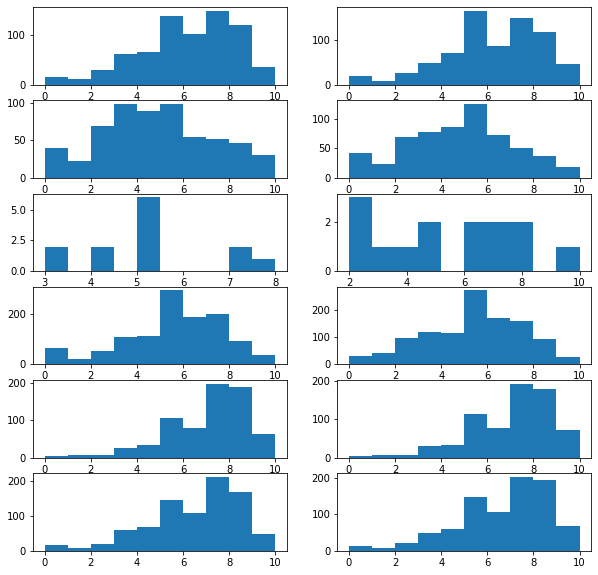

In [173]:
# Let's test for normality
plt.subplots(6, 2, figsize=(10, 10))
trust_ch = ess.loc[ess['cntry'] == 'CH']
trust_cz = ess.loc[ess['cntry'] == 'CZ']
trust_de = ess.loc[ess['cntry'] == 'DE']
trust_es = ess.loc[ess['cntry'] == 'ES']
trust_no = ess.loc[ess['cntry'] == 'NO']
trust_se = ess.loc[ess['cntry'] == 'SE']

plt.subplot(621)
plt.hist(trust_ch.loc[ess['year'] == 6].ppltrst)
plt.subplot(622)
plt.hist(trust_ch.loc[ess['year'] == 7].ppltrst)

plt.subplot(623)
plt.hist(trust_cz.loc[ess['year'] == 6].ppltrst)
plt.subplot(624)
plt.hist(trust_cz.loc[ess['year'] == 7].ppltrst)

plt.subplot(625)
plt.hist(trust_de.loc[ess['year'] == 6].ppltrst)
plt.subplot(626)
plt.hist(trust_de.loc[ess['year'] == 7].ppltrst)

plt.subplot(627)
plt.hist(trust_es.loc[ess['year'] == 6].ppltrst)
plt.subplot(628)
plt.hist(trust_es.loc[ess['year'] == 7].ppltrst)

plt.subplot(6, 2, 9)
plt.hist(trust_no.loc[ess['year'] == 6].ppltrst)
plt.subplot(6, 2, 10)
plt.hist(trust_no.loc[ess['year'] == 7].ppltrst)

plt.subplot(6, 2, 11)
plt.hist(trust_se.loc[ess['year'] == 6].ppltrst)
plt.subplot(6, 2, 12)
plt.hist(trust_se.loc[ess['year'] == 7].ppltrst)

plt.show()

They all look pretty normal with the exception of the Germany data which for whatever reason has a very small sample size. So we will use ANOVA to parametrically determine whether the difference between 2016 and 2018 are significantly different for all the countries except Germany. But since there are only 14 datapoints, it will be difficult to tell if the distribution will resemble a normal one (it seems likely from the other countries' data distribution) and any difference between the two group means will most likely be due to the randomness in the data.

In [191]:
# t-test for each country data from 2016 and 2018 as related samples
#print(trust_ch['ppltrst'].loc[trust_ch['year'] == 6].mean())
#print(trust_ch['ppltrst'].loc[trust_ch['year'] == 7].mean())

def do_rel_ttest(country, column):
    
    abbrev = {'Switzerland'   : 'CH',
              'Czech_Republic': 'CZ',
              'Germany'       : 'DE',
              'Spain'         : 'ES',
              'Norway'        : 'NO',
              'Sweden'        : 'SE'}
    
    country_data = ess.loc[ess['cntry'] == abbrev[country]]
    #print(country_data)
    
    metric_16 = country_data[column].loc[country_data['year'] == 6].dropna()
    metric_18 = country_data[column].loc[country_data['year'] == 7].dropna()
    
    test_rows = min(len(metric_16), len(metric_18))
    print(test_rows)
    
    metric_16 = metric_16[:test_rows]
    metric_18 = metric_18[:test_rows]
    
    T, p = stats.ttest_rel(metric_16, metric_18)
    
    print('{}:\n t-stat: {}\n p-value: {}\n'.format(country, T, p))
    
do_rel_ttest('Switzerland', 'ppltrst')
do_rel_ttest('Czech_Republic', 'ppltrst')
do_rel_ttest('Germany', 'ppltrst')
do_rel_ttest('Spain', 'ppltrst')
do_rel_ttest('Norway', 'ppltrst')
do_rel_ttest('Sweden', 'ppltrst')


773
Switzerland:
 t-stat: -0.6586851756725737
 p-value: 0.5102943511301135

651
Czech_Republic:
 t-stat: -0.440219908609957
 p-value: 0.6599241894564367

14
Germany:
 t-stat: -0.18399501804849683
 p-value: 0.8568563797095805

1211
Spain:
 t-stat: 2.4899311620174567
 p-value: 0.012910195297604806

730
Norway:
 t-stat: 0.5372131705675822
 p-value: 0.5912843025869986

906
Sweden:
 t-stat: -2.084246978881489
 p-value: 0.03741765719366441



So it looks like out of the six countries, only two showed significant change in trust in people. Spanish respondents got more trusting, and Swedish got less trusting.

__2. Did people become happier from 2012 to 2014? Compute results fo each country in the sample.__

Looks like we are in luck! We can just reuse the function from earlier provided that the data is normal.

In [196]:
# first let's see how the happiness score fared overall between 2016 and 2018
happy_2016 = ess['happy'].loc[ess['year'] == 6].mean()
happy_2018 = ess['happy'].loc[ess['year'] == 7].mean()
print('2016: %0.2f\n2018: %0.2f' % (happy_2016, happy_2018))

2016: 7.72
2018: 7.67


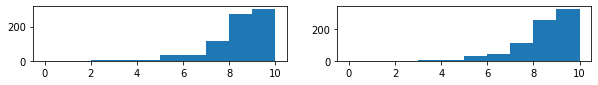

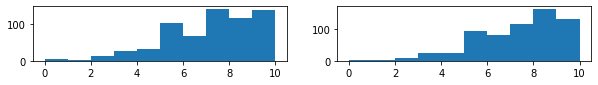

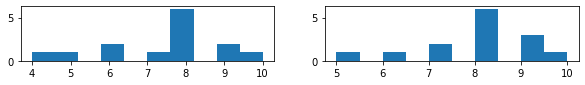

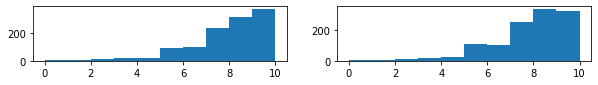

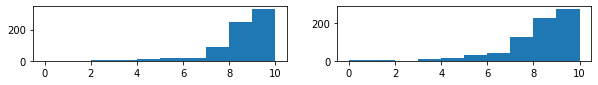

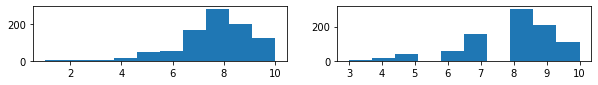

In [227]:
# visual check for normality
def plot_normal(country, column):
    
    abbrev = {'Switzerland'   : 'CH',
              'Czech_Republic': 'CZ',
              'Germany'       : 'DE',
              'Spain'         : 'ES',
              'Norway'        : 'NO',
              'Sweden'        : 'SE'}
    
    metric_2016 = ess['happy'].loc[(ess['cntry'] == abbrev[country]) & (ess['year'] == 6)].dropna()
    metric_2018 = ess['happy'].loc[(ess['cntry'] == abbrev[country]) & (ess['year'] == 7)].dropna()

    plt.subplots(1, 2, figsize=(10, 1))
    plt.subplot(121)
    plt.hist(metric_2016)
    plt.subplot(122)
    plt.hist(metric_2018)
    plt.show()
    
    
plot_normal('Switzerland', 'happy')
plot_normal('Czech_Republic', 'happy')
plot_normal('Germany', 'happy')
plot_normal('Spain', 'happy')
plot_normal('Norway', 'happy')
plot_normal('Sweden', 'happy')

Ahh, most decidedly non-normal. Let's tweak the function to perform non-parametric tests on these dependent samples. Except for Germany and Sweden.

In [225]:
# function to test variance
def test_non_para(country, column):
    
    abbrev = {'Switzerland'   : 'CH',
              'Czech_Republic': 'CZ',
              'Germany'       : 'DE',
              'Spain'         : 'ES',
              'Norway'        : 'NO',
              'Sweden'        : 'SE'}
    
    # group data by country
    df = ess.loc[ess['cntry'] == abbrev[country]].dropna()
    
    # rank data
    df[column + '_rank'] = stats.rankdata(df['happy'])
    
    metric_16 = df[column + '_rank'].loc[df['year'] == 6]
    metric_18 = df[column + '_rank'].loc[df['year'] == 7]
    
    test_rows = min(len(metric_16), len(metric_18))
    #print(test_rows)
    
    metric_16 = metric_16[:test_rows]
    metric_18 = metric_18[:test_rows]
    
    H, p = stats.kruskal(metric_16, metric_18)
        
    print('{}:\n H-stat: {}\n p-value: {}\n'.format(country, H, p))

In [228]:
test_non_para('Switzerland', 'happy')
test_non_para('Czech_Republic', 'happy')
test_non_para('Germany', 'happy')
test_non_para('Spain', 'happy')
test_non_para('Norway', 'happy')
test_non_para('Sweden', 'happy')

732
Switzerland:
 H-stat: 0.7821046117351174
 p-value: 0.3764982466188457

601
Czech_Republic:
 H-stat: 0.6785590415675314
 p-value: 0.4100833549575241

13
Germany:
 H-stat: 0.4578754578754809
 p-value: 0.4986185580950411

1134
Spain:
 H-stat: 3.0412473602384447
 p-value: 0.08117352096431373

708
Norway:
 H-stat: 17.41408038100125
 p-value: 3.0059100145358804e-05

859
Sweden:
 H-stat: 0.07945680214001244
 p-value: 0.7780348894383852



The Norwegians got 